In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
import IPython.display as ipd
import mbe
import matplotlib.pyplot as plt
import numpy as np

In [35]:
def plot_signal(x, sr):
    time = np.arange(0, len(x) / sr, 1/sr)
    plt.plot(time, x, linewidth=0.5)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")

In [36]:
# fpath = "audio/FunkyDrums-44p1-stereo-25secs.wav"
fpath = "/Users/maxhenry/Documents/Matlab/eers-audio-toolbox/audio/speech_REF.wav"

x, sr = mbe.util.audioread(fpath)

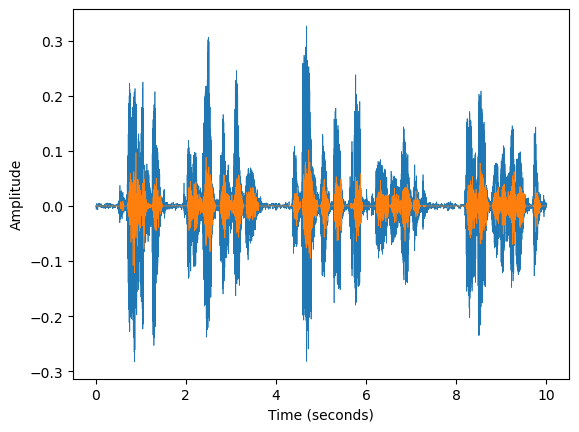

In [37]:
block_size = 2048

frame_size = 256
num_overlap = 4
num_partials = 30

buffer = mbe.Mbe(frame_size, num_overlap, num_partials, sr)

num_blocks = len(x) // block_size

y = []
p_in = 0
p_out = p_in + block_size
for i in range(num_blocks):
    block = x[p_in:p_out].copy()

    block = buffer.process_block(block)

    y.append(block)

    p_in += block_size
    p_out += block_size

y = np.concatenate(y)

plot_signal(x, sr)
plot_signal(y, sr)
plt.show()

ipd.display(ipd.Audio(x, rate=sr))
ipd.display(ipd.Audio(y, rate=sr))


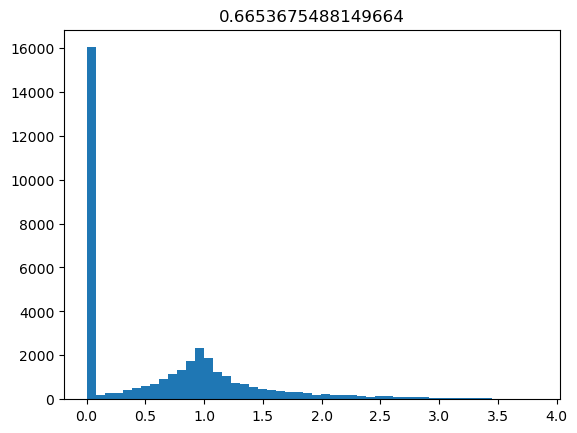

In [38]:
errors = buffer.get_debug()
plt.hist(np.array(errors).flatten(), bins=50)
plt.title(np.mean(np.array(errors)))
plt.show()
